In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image


In [2]:
feature0 = pd.read_parquet("/content/drive/My Drive/Colab Folder/bengali grapheme/train_image_data_0.parquet", ).drop('image_id', axis=1)
feature0.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,32292,32293,32294,32295,32296,32297,32298,32299,32300,32301,32302,32303,32304,32305,32306,32307,32308,32309,32310,32311,32312,32313,32314,32315,32316,32317,32318,32319,32320,32321,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
0,254,253,252,253,251,252,253,251,251,253,254,253,253,253,254,253,252,253,253,253,253,252,252,253,253,252,252,253,252,252,252,253,254,253,253,252,252,252,253,252,...,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,251
1,251,244,238,245,248,246,246,247,251,252,250,250,246,249,248,250,249,251,252,253,253,253,253,253,253,253,250,249,251,252,251,251,251,251,252,253,251,250,252,251,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,254
2,251,250,249,250,249,245,247,252,252,252,253,252,252,251,250,251,253,254,251,251,252,252,253,253,252,251,251,249,251,252,252,253,252,251,251,251,250,250,252,253,...,253,253,252,252,252,253,253,253,253,253,252,251,251,250,250,250,251,251,251,250,250,250,251,252,253,253,253,253,254,254,254,253,252,252,253,253,253,253,251,249
3,247,247,249,253,253,252,251,251,250,250,251,250,249,251,251,251,250,252,251,245,245,251,252,251,252,252,250,249,250,251,250,249,250,251,252,253,252,252,252,252,...,253,252,252,254,253,253,254,253,252,253,254,253,252,253,254,254,254,254,254,254,254,254,253,252,253,254,253,252,253,254,254,254,254,254,254,253,253,252,251,252
4,249,248,246,246,248,244,242,242,229,225,231,229,229,228,221,224,226,221,221,220,217,217,218,219,222,224,214,218,227,227,227,228,224,231,235,235,233,212,183,196,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255


### Visualizing Some Images

12


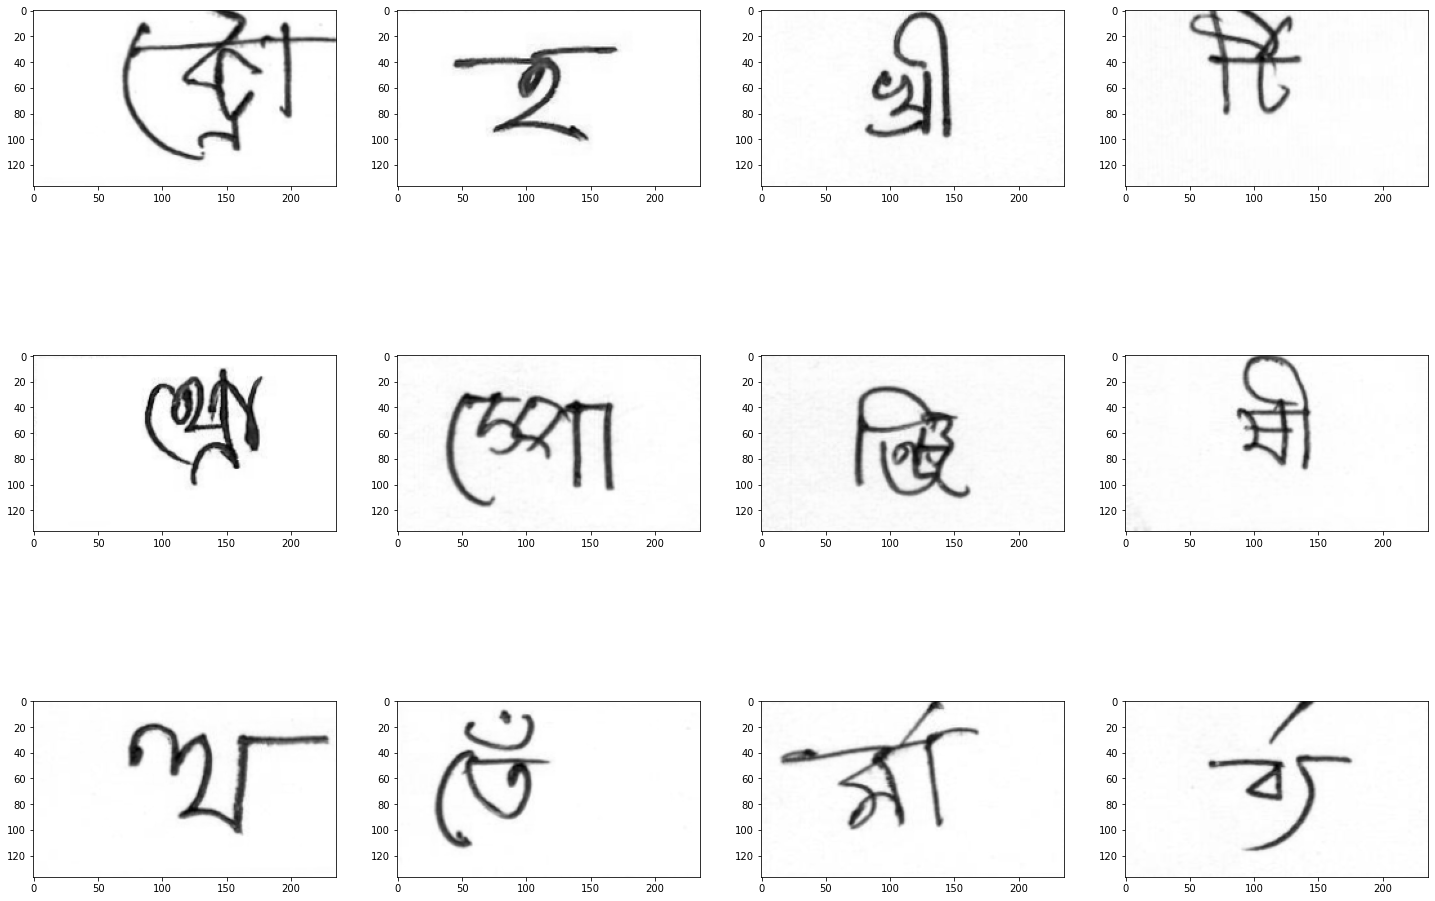

In [5]:
pictures = feature0.iloc[:12, :]
picture_count = pictures.shape[0]
print(picture_count)

fig = plt.figure(figsize=(25, 18))
columns = 4

rows = np.ceil(picture_count / columns)
for i, row in pictures.iterrows():
  img = row.values.reshape((137, 236))
  fig.add_subplot(rows, columns, i + 1)
  plt.imshow(img, cmap="gray")
plt.show()


In [12]:
label = pd.read_csv("/content/drive/MyDrive/Colab Folder/bengali grapheme/train.csv", usecols=['grapheme_root', 'vowel_diacritic', 'consonant_diacritic'])
label.head()


,grapheme_root,vowel_diacritic,consonant_diacritic
0,15,9,5
1,159,0,0
2,22,3,5
3,53,2,2
4,71,9,5


In [17]:
X = feature0.iloc[:1000, :].values
y = label.iloc[:1000, 0].values 
print("Shape of X is : {}  and Shape of y is : {}".format(X.shape, y.shape)) 


Shape of X is : (1000, 32332)  and Shape of y is : (1000,)


In [18]:
tsne = TSNE(random_state=42, n_components=2, verbose=0, perplexity=40, n_iter=300).fit_transform(X)

Text(0.5, 1.0, 'Visualizing Kannada MNIST through t-SNE')

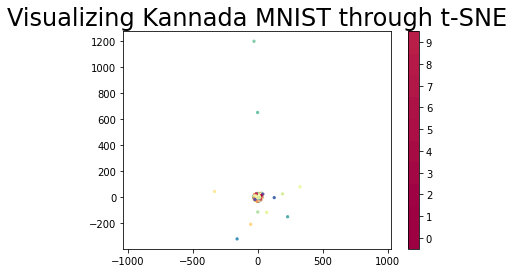

In [19]:
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through t-SNE', fontsize=24)


In [31]:
import albumentations
aug = albumentations.Compose([
         albumentations.Resize(137, 236, always_apply=True),
         albumentations.ShiftScaleRotate(shift_limit=0.0625,
                                         scale_limit=0.1,
                                         rotate_limit=5,
                                         p=0.9),
         albumentations.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), always_apply=True)              
                         ])


In [33]:
image = feature0.iloc[0, :].values
image = image.reshape(137, 236).astype(float)
image = Image.fromarray(image).convert("RGB")
image = aug(image=np.array(image))['image']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


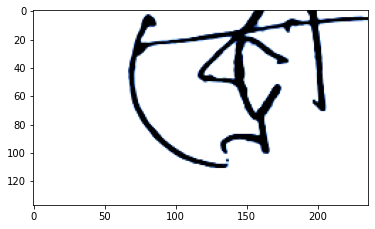

In [34]:
plt.imshow(image)

In [35]:
image = feature0.iloc[3, :].values
image = image.reshape(137, 236).astype(float)
image = Image.fromarray(image).convert("RGB")
image = aug(image=np.array(image))['image']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


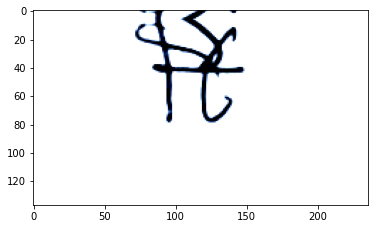

In [36]:
plt.imshow(image)